<a href="https://colab.research.google.com/github/corp-alt/SDS-PhD-2019-Portfolio---Dominic/blob/master/Day_2_Portfolio_(Dominic)_SDS_Ph_D_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


## Unsupervised learning

In [0]:
# Select the variable needed for dimensionality reduction

In [0]:
turnover.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [0]:
salary_mapper = {'low':0, 'medium':1, 'high':2}

In [0]:
turnover['salary_recode'] = turnover.salary.map(salary_mapper)

In [0]:
turnover['salary_recode'].unique()

array([0, 1, 2])

In [0]:
turnover.department.value_counts(normalize=True)

sales         0.276
technical     0.181
support       0.149
IT            0.082
product_mng   0.060
marketing     0.057
RandD         0.052
accounting    0.051
hr            0.049
management    0.042
Name: department, dtype: float64

In [0]:
dep_matrix = pd.get_dummies(turnover.department)

In [0]:
data = pd.concat([turnover, dep_matrix], axis = 1)

In [0]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,salary_recode,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.380,0.530,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.570,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14995,0.370,0.480,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14996,0.370,0.530,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14997,0.110,0.960,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0


In [0]:
data.drop(['department', 'salary', 'churn'], axis = 1, inplace=True)

## Scaling


In [0]:
# Preprocess (Scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [0]:
pd.DataFrame(data_scaled, columns = data.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary_recode,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.147,-0.933,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.147,-0.933,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.147,0.636,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,-0.617,-0.418,-0.471
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.147,0.636,-0.298,-0.235,-0.232,-0.228,-0.209,-0.246,-0.253,1.620,-0.418,-0.471
max,1.557,1.659,2.594,2.182,4.453,2.432,6.784,2.206,3.350,4.250,4.308,4.393,4.776,4.060,3.953,1.620,2.394,2.125


## Dimensionality Reduction

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

In [0]:
# Fit the model
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Fit and transform the data
data_reduced = pca.transform(data_scaled)

## Exploring the PCA

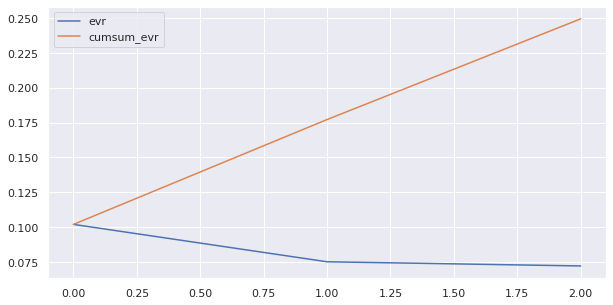

In [0]:
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

TypeError: ignored

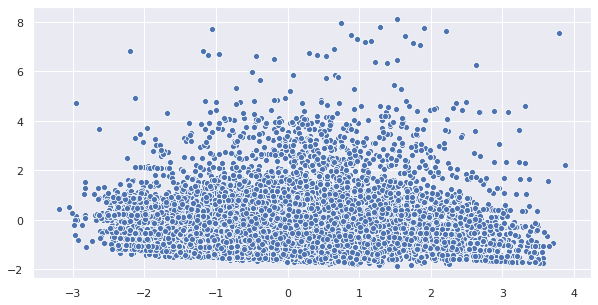

In [0]:
# Scatter plot of the first 2 components
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

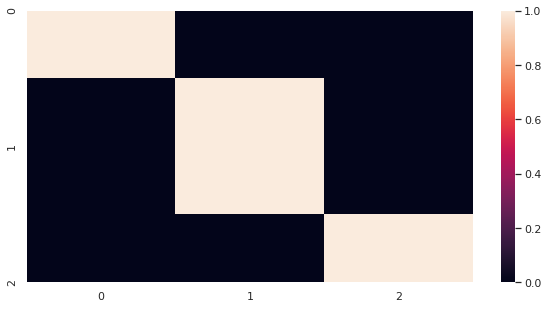

In [0]:
# Correlation of the components
sns.heatmap(pd.DataFrame(data_reduced).corr())

## Clustering

In [0]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters = 4)

In [0]:
clusterer.fit(data_scaled)

## Supervised ML

In [0]:
## Preprocess the data

In [0]:
# Import Altair
import altair as alt

sns.set(rc={'figure.figsize':(10,10)})

In [0]:
## FIX DATA

In [0]:
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary_recode,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.380,0.530,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.570,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.370,0.480,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.370,0.530,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.110,0.960,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
# Select the (independant) features that we are going to use to train the model
X = data

In [0]:
# Define the dependant variabel / target to predict (world region)
y = turnover.churn
y.unique()

array([1, 0])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluation of performance
from sklearn.metrics import classification_report

## Try to predict "churn" using a simple model (Logistic Regression)

In [0]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.78916667 0.795      0.79416667 0.8025     0.78449354]
0.7886666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



## Try a more advanced model (e.g. Random Forest)

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.98625    0.98583333 0.98666667 0.98833333 0.98957899]
0.987


## Evaluate your model

In [0]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Predict "satisfaction" (!!! This is a regression model)

In [0]:
data_new = data.drop(['satisfaction'], axis = 1)
x_new = data_new

In [0]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
promotion               14999 non-null int64
salary_recode           14999 non-null int64
IT                      14999 non-null uint8
RandD                   14999 non-null uint8
accounting              14999 non-null uint8
hr                      14999 non-null uint8
management              14999 non-null uint8
marketing               14999 non-null uint8
product_mng             14999 non-null uint8
sales                   14999 non-null uint8
support                 14999 non-null uint8
technical               14999 non-null uint8
dtypes: float64(1), int64(6), uint8(10)
memory usage: 966.9 KB


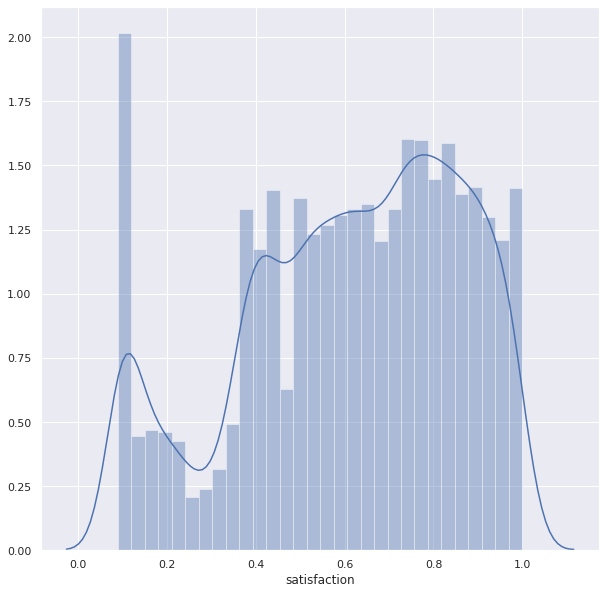

In [0]:
# Define the dependant variabel / target to predict (world region)
y_new = data.satisfaction
sns.distplot(y_new)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
x_new_scaled = scaler.fit_transform(x_new)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new_scaled, y_new, test_size = 0.2, random_state = 42)

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [0]:
# Import and instantiate the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.06483053 0.05495027 0.05730663 0.06442653 0.06131544]
0.06086032104875416


In [0]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

ValueError: ignored

In [0]:
# Import and instantiate the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.42383343 0.44770996 0.46798375 0.47358212 0.46814814]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4587313427629855
